## Ejemplo de LDA para el problema de las transparencias

### Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.feature_selection as FS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### Creación de los datos:

Las x son vectores columna.

In [2]:
X1 = np.array([[4,1],[2,4],[2,3],[3,6],[4,4]]).T
X2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]]).T
print(X1)
print(X2)

[[4 2 2 3 4]
 [1 4 3 6 4]]
[[ 9  6  9  8 10]
 [10  8  5  7  8]]


### Vector de medias para cada clase:

Metemos una dimensión vacía (haciendo ``[:, None]``) para que las medias sigan siendo vectores columna.

In [3]:
mu1 = X1.mean(axis=1)[:, None]
print(mu1)

[[3. ]
 [3.6]]


In [4]:
mu2 = X2.mean(axis=1)[:, None]
print(mu2)

[[8.4]
 [7.6]]


### Representación gráfica:

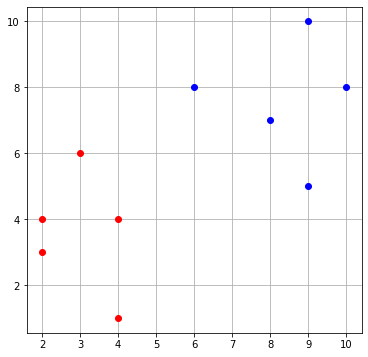

In [5]:
plt.figure(figsize=(6, 6))
plt.plot(X1[0, :], X1[1, :], 'ro')
plt.plot(X2[0, :], X2[1, :], 'bo')
plt.grid(True)

### Matriz de dispersión inter-clase:

In [6]:
Sb = np.dot(mu1 - mu2, (mu1 - mu2).T)
print(Sb)

[[29.16 21.6 ]
 [21.6  16.  ]]


### Matrices de dispersión de cada clase:

In [7]:
S1 = np.dot(X1 - mu1, (X1 - mu1).T)
print(S1)

[[ 4.  -2. ]
 [-2.  13.2]]


In [8]:
S2 = np.dot(X2 - mu2, (X2 - mu2).T)
print(S2)

[[ 9.2 -0.2]
 [-0.2 13.2]]


### Matriz de dispersión intra-clase:

In [9]:
n1 = X1.shape[1]
n2 = X2.shape[1]
pi1 = n1/(n1+n2)
pi2 = n2/(n1+n2)

Sw = pi1*S1 + pi2*S2
print(Sw)

[[ 6.6 -1.1]
 [-1.1 13.2]]


### Proyección de Fisher:

In [10]:
w = np.dot(np.linalg.inv(Sw), mu1 - mu2)
print(w)

[[-0.8809219 ]
 [-0.37644046]]


### Puntos proyectados:

In [11]:
X1proy = np.dot(w.T, X1)
print(X1proy)

[[-3.90012804 -3.26760563 -2.89116517 -4.90140845 -5.02944942]]


In [12]:
X2proy = np.dot(w.T, X2)
print(X2proy)

[[-11.69270166  -8.29705506  -9.81049936  -9.68245839 -11.82074264]]


### Representación gráfica:

In [13]:
w2 = np.dot(w.T, w)

(-0.75, 15.75, -0.5, 10.5)

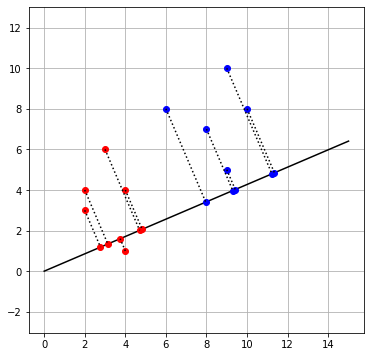

In [14]:
plt.figure(figsize=(6, 6))
# Puntos de clase 1:
plt.plot(X1[0, :], X1[1, :], 'ro')
# Puntos de clase 2:
plt.plot(X2[0, :], X2[1, :], 'bo')
# Direccion de proyeccion:
plt.plot([0, 15], [0, 15*w[1]/w[0]], 'k-')
# Puntos de clase 1 proyectados:
p1 = w*X1proy/w2
plt.plot(p1[0, :], p1[1, :], 'ro')
for i in range(5):
  plt.plot([X1[0, i], p1[0, i]], [X1[1, i], p1[1, i]], ':k')
# Puntos de clase 2 proyectados:
p2 = w*X2proy/w2
plt.plot(p2[0, :], p2[1, :], 'bo')
for i in range(5):
  plt.plot([X2[0, i], p2[0, i]], [X2[1, i], p2[1, i]], ':k')
plt.grid(True)
plt.axis('equal')

# LDA para un problema con más clases

### Primero subimos el fichero ``wine_dataset.csv`` al runtime de google:

### Y cargamos los datos:

In [16]:
data = pd.read_csv("./wine_dataset.csv", delimiter=";")
data.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Cambiamos la clase (variable Type) a valor categórico:

In [17]:
categories = pd.Categorical(data["Type"]).codes
print(categories)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
data["Type"] = categories
data.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Separamos la clase del resto de atributos:

In [19]:
y = data["Type"].values
x = data.drop("Type", 1).values

### Aplicamos LDA a los datos:

In [20]:
lda = LDA(n_components=2)
x_lda = lda.fit_transform(x, y)
print("Porcentaje explicado:", lda.explained_variance_ratio_)

Porcentaje explicado: [0.68747889 0.31252111]


### Y representamos gráficamente la proyección:

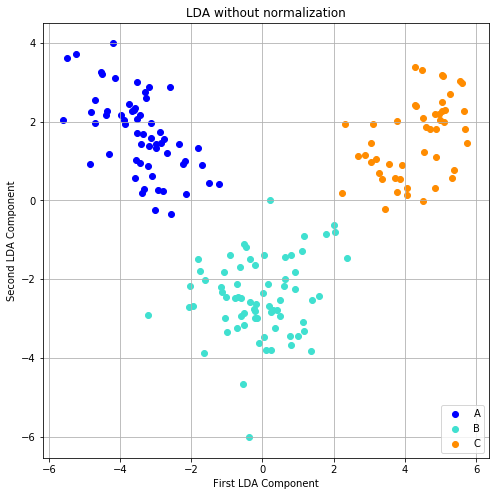

In [21]:
# Dividimos en los 3 tipos para ponerles diferentes colores
lda_A = x_lda[y == 0]
lda_B = x_lda[y == 1]
lda_C = x_lda[y == 2]

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(x = lda_A[:, 0], y = lda_A[:, 1], c="blue")
plt.scatter(x = lda_B[:, 0], y = lda_B[:, 1], c="turquoise")
plt.scatter(x = lda_C[:, 0], y = lda_C[:, 1], c="darkorange")
plt.title("LDA without normalization")
plt.xlabel("First LDA Component")
plt.ylabel("Second LDA Component")
plt.legend((["A","B","C"]), loc="lower right")
plt.grid(True)
plt.show()


# Ejercicio

### Volver a hacer este ejemplo sin utilizar la clase ``LinearDiscriminantAnalysis`` de ``sklearn``. Todos los cálculos se deben hacer con funciones de ``numpy`` como en el primer ejemplo.